#### why is data missing?
Hesitation of people to put down the information
data source multiple, survey not competent

### What are the different types of Missing Data?

##### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


##### Missing Data Not At Random(MNAR):
Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [9]:
df["Cabin"].isnull().mean()

0.7710437710437711

In [11]:
import numpy as np

In [12]:
df["cabin_null"]=np.where(df["Cabin"].isnull(), 1, 0)

In [13]:
df["cabin_null"].mean()

0.7710437710437711

In [14]:
df.groupby(["Survived"])["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### MAR:Missing at Random
When data are MAR, the fact that the data are missing is systematically related to the observed but not the unobserved data.15 For example, a registry examining depression may encounter data that are MAR if male participants are less likely to complete a survey about depression severity than female participants. That is, if probability of completion of the survey is related to their sex (which is fully observed) but not the severity of their depression, then the data may be regarded as MAR. Complete case analyses, which are based on only observations for which all relevant data are present and no fields are missing, of a data set containing MAR data may or may not result in bias. If the complete case analysis is biased, however, proper accounting for the known factors (in the above example, sex) can produce unbiased results in analysis.


### All the techniques of handling missing values
1. Mean/Median/Mode imputation: MCAR
2. Random Sample Imputation : MCAR

In [28]:
df=pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [30]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
def missing_values(df, variable, median):
    df[variable+ "_median"]=df[variable].fillna(median)

In [32]:
m=df.Age.median()

In [33]:
m

28.0

In [34]:
missing_values(df, "Age", m)

In [36]:
df.head(20)

,Survived,Age,Fare,variable_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [37]:
print(df["Age"].std())
print(df["variable_median"].std())

14.526497332334044
13.019696550973194


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

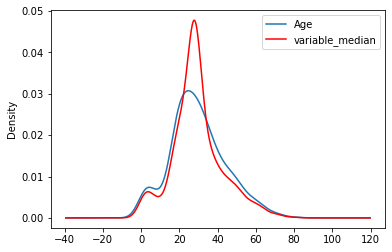

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.variable_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [2]:
import pandas as pd
df=pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [4]:
df.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [5]:
from sunbird.nan_values import median_imputation

In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

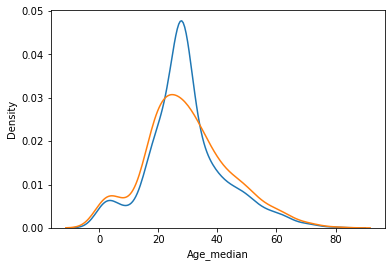

In [9]:
median_imputation(df, "Age", plot=True)

In [11]:
df.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,28.0,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [12]:
df.Age.median()

28.0

In [13]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

#### Mean Imputation

In [14]:
df=pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [15]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [16]:
from sunbird.nan_values import mean_imputation

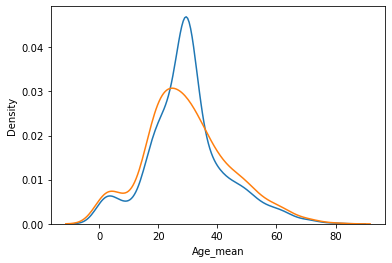

In [17]:
mean_imputation(df, "Age", plot=True)

In [18]:
df.head(20)

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
5,0,29.699118,8.4583
6,0,54.000000,51.8625
7,0,2.000000,21.0750
8,1,27.000000,11.1333
9,1,14.000000,30.0708


In [19]:
df.Age.mean()

29.699117647058763

In [20]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

#### Random Sample Imputation

In [21]:
df=pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [22]:
df.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [ ]:
#def missing_values(df, variable, median):
    df[variable+ "_median"]=df[variable].fillna(median)
    df[variable+ "_random"]=df[variable].fillna(sample)

In [42]:
df=pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [43]:
from sunbird.nan_values import random_sampler

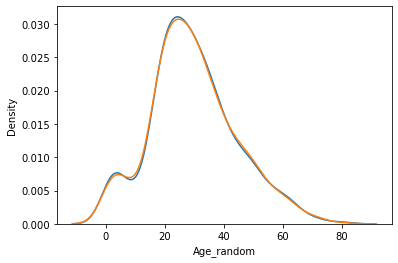

In [44]:
random_sampler(df, "Age", plot=True)

In [29]:
df.Age.sample()

680    24.0
Name: Age, dtype: float64

### End of Distribution Imputation: MNAR

##### One would want to replace missing data with values that are at the tails of distribution of the variable

In [45]:
df=pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [46]:
from sunbird.nan_values import endof_distribution

<AxesSubplot:>

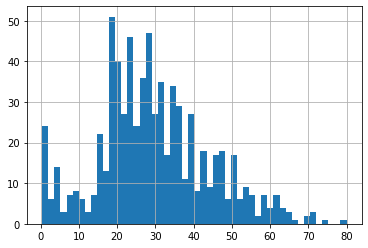

In [47]:
df["Age"].hist(bins=50)

In [48]:
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

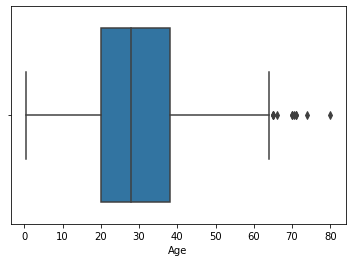

In [49]:
sns.boxplot("Age", data=df)

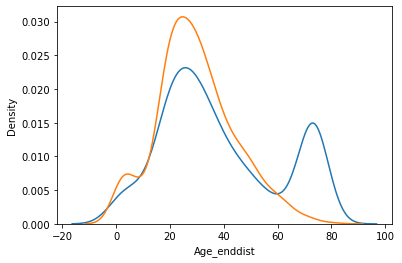

In [50]:
endof_distribution(df, "Age", plot=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

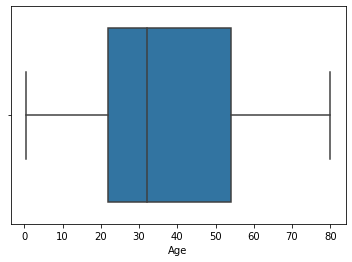

In [51]:
sns.boxplot("Age", data=df)

In [36]:
df.head(20)

,Survived,Age,Fare
0,0,22.00,7.2500
1,1,38.00,71.2833
2,1,26.00,7.9250
3,1,35.00,53.1000
4,0,35.00,8.0500
5,0,28.00,8.4583
6,0,54.00,51.8625
7,0,2.00,21.0750
8,1,27.00,11.1333
9,1,14.00,30.0708


<AxesSubplot:>

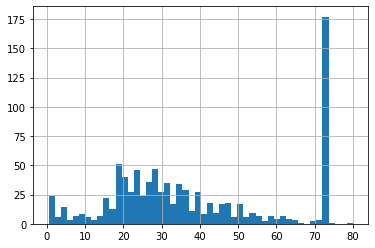

In [52]:
df["Age"].hist(bins=50)

#### Arbitrary value imputation

In [63]:
## Arbitrary values should be different from the mean/median/mode and not within the normal values of the variable
## Recommende to use the outliers values

In [58]:
df=pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [59]:
from sunbird.nan_values import arbitrary_imputation

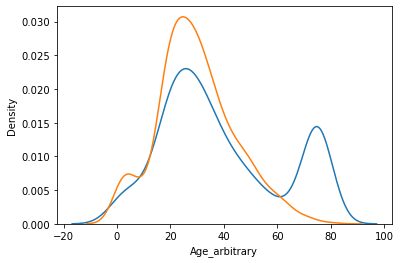

In [60]:
arbitrary_imputation(df, "Age", 75, plot=True)

In [61]:
df.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,75.0,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

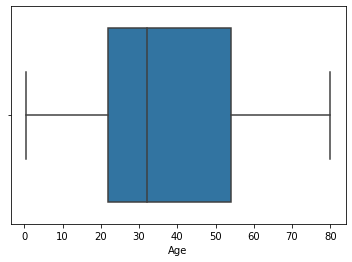

In [62]:
sns.boxplot("Age", data=df)

### Capturing NAN Imputation

In [76]:
df=pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [70]:
#from sunbird.nan_values import capture_nan

In [77]:
import numpy as np

In [78]:
df["Age_Nan"]= np.where(df["Age"].isnull(), 1, 0)

In [80]:
df.head(20)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Frequent value/Category Imputation

#### Used for categorical missing values, 
In this technique we sort the values in the descending order, the first value in that order becomes the most frequent value & Replace the missing values with that the frequent values

In [82]:
df=pd.read_csv("train.csv")

In [83]:
df.shape

(1460, 81)

In [84]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [103]:
df=pd.read_csv("train.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])

In [104]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [89]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

<AxesSubplot:>

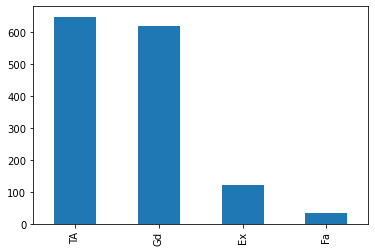

In [91]:
df["BsmtQual"].value_counts().plot.bar()

<AxesSubplot:>

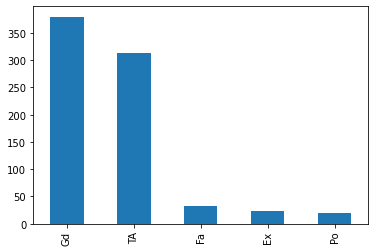

In [93]:
df["FireplaceQu"].value_counts().plot.bar()

<AxesSubplot:>

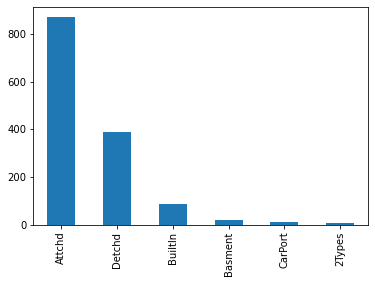

In [94]:
df["GarageType"].value_counts().plot.bar()

In [105]:
from sunbird.nan_values import frequent

In [101]:
frequent(df, "FireplaceQu")

In [102]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [107]:
for feature in ["BsmtQual", "FireplaceQu", "GarageType"]:
    frequent(df, feature)

In [108]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [109]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Fill with Missing Imputation

In [110]:
df=pd.read_csv("train.csv", usecols=["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"])

In [111]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [112]:
from sunbird.nan_values import fill_missing

In [113]:
for feature in ["BsmtQual", "FireplaceQu", "GarageType"]:
    fill_missing(df, feature)

In [114]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Predicting the missing values using Regression

In [118]:
df=pd.read_csv("titanic_train.csv")

In [119]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
linreg=LinearRegression()

In [121]:
data_with_null=df[["PassengerId", "Pclass", "Survived", "SibSp", "Parch", "Fare", "Age"]]

In [122]:
data_without_null=data_with_null.dropna()

In [ ]:
#without age

In [123]:
train_x=data_without_null.iloc[:, :6]

In [124]:
train_x.head()

,PassengerId,Pclass,Survived,SibSp,Parch,Fare
0,1,3,0,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,3,1,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,3,0,0,0,8.0500


In [125]:
## Only age

In [126]:
train_y=data_without_null.iloc[:,6]

In [127]:
train_y.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [128]:
## Training

In [129]:
linreg.fit(train_x, train_y)

LinearRegression()

In [ ]:
#Predict

In [135]:
test_data=data_with_null.iloc[:, :6]
age_predicted["Age"]=pd.DataFrame(linreg.predict(test_data))

In [132]:
age_predicted.head()

,0
0,24.980663
1,33.299445
2,22.172865
3,33.571320
4,28.956368


In [137]:
data_with_null.Age.fillna(age_predicted.Age, inplace=True)

In [138]:
data_with_null.head(20)

,PassengerId,Pclass,Survived,SibSp,Parch,Fare,Age
0,1,3,0,1,0,7.2500,22.000000
1,2,1,1,1,0,71.2833,38.000000
2,3,3,1,0,0,7.9250,26.000000
3,4,1,1,1,0,53.1000,35.000000
4,5,3,0,0,0,8.0500,35.000000
5,6,3,0,0,0,8.4583,28.950624
6,7,1,0,0,0,51.8625,54.000000
7,8,3,0,3,1,21.0750,2.000000
8,9,3,1,0,2,11.1333,27.000000
9,10,2,1,1,0,30.0708,14.000000
